<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/EDP_Solucion_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Importamos las librerias que vamos a utilizar

In [ ]:
x = sp.symbols('x')
k = sp.symbols('k', positive=True, real=True)
X = sp.Function('X')

Ponemos las variables como simbolos, aquí k es un numero real

In [ ]:
ode = Eq(X(x).diff(x, 2) + (k)*X(x), 0)

Escribimos la ecuación diferencial ordinaria $X''(x)+kX(x)=0$

In [ ]:
sol = dsolve(ode, X(x))
print("Solución general:", sol)


Solución general: Eq(X(x), C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x))


Aqui se resuelve simbolicamente la ecuacion diferencial

In [ ]:
X_general = sol.rhs
print(X_general)

C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x)


Se aqui se toma la parte que nos interesa, en este caso la solucion general $X(x)= C1*sen(k*x)+C2*cos(k+x)$

In [ ]:
C1, C2 = symbols('C1 C2')
bc1 = X_general.subs(x, 0)
bc2 = X_general.subs(x, 1)

Usamos estos valores para las condiciones iniclaes $X(0)=0, X(1)=0$ , el codigo ,subs sirve para ponerle valor a las variables

In [ ]:
sist1 = [bc1, bc2]
consts1 = solve(sist1, [C1, C2], dict=True)
print("Solución del sistema (caso 1):", consts1)

Solución del sistema (caso 1): [{C1: 0, C2: 0}]


Aqui generamos un sistema de ecuaciones, y se resuelve con solve

In [ ]:
k_cond1 = [simplify(sol) for sol in solve(bc2.subs(C1, 0), k)]
k_cond1 = k_cond1[0] if k_cond1 else None
print(k_cond1)

pi**2/4


In [ ]:
k_val1 = pi**2
X1 = X_general.subs({C1: 0, C2: 1, k: k_val1}).rewrite(sin)
print(X1)

sin(pi*x + pi/2)


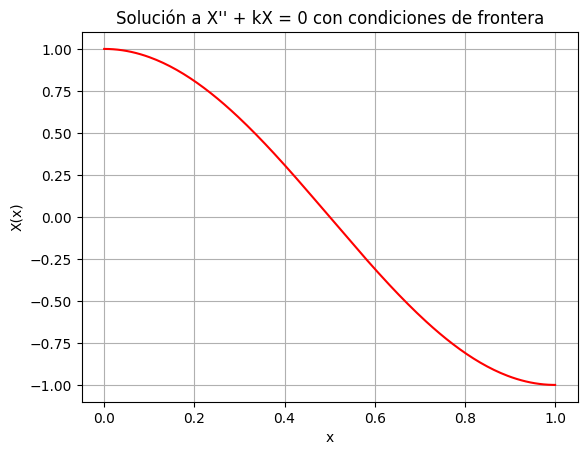

In [ ]:
f1 = lambdify(x, X1, 'numpy')
xx = np.linspace(0, 1, 200)
yy1 = f1(xx)

plt.plot(xx, yy1, 'r', label="Caso 1: X(0)=X(1)=0")
plt.xlabel('x')
plt.ylabel('X(x)')
plt.title("Solución a X'' + kX = 0 con condiciones de frontera")
plt.grid(True)


Aqui hacemos la gráfica

In [ ]:
Xp = X_general.diff(x)
bc3 = Xp.subs(x, 0)
bc4 = Xp.subs(x, 1)

Hacemos las variables con los valores iniciales

In [ ]:
sist2 = [bc3, bc4]
consts2 = solve(sist2, [C1, C2], dict=True)
print("Solución del sistema (caso 2):", consts2)


Solución del sistema (caso 2): [{C1: 0, C2: 0}]


Realizamos el sistema de ecuaciones, para obtere los valores de las constantes

In [ ]:
k_val2 = (pi)**2
X2 = X_general.subs({C2: 0, C1: 1, k: k_val2}).rewrite(cos)


De igual manera que arriba, aqui buscamos la soluión no trivial, con $k= \piˆ2$

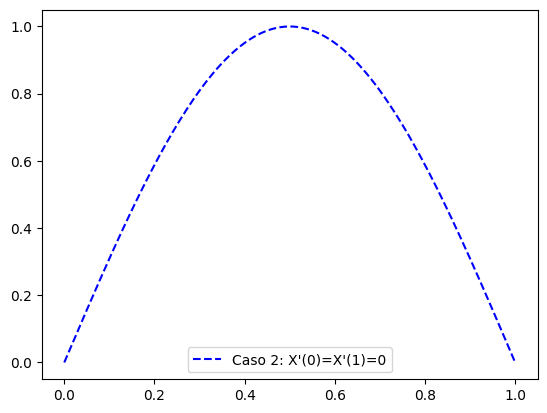

In [ ]:
f2 = lambdify(x, X2, 'numpy')
yy2 = f2(xx)

plt.plot(xx, yy2, 'b--', label="Caso 2: X'(0)=X'(1)=0")
plt.legend()
plt.show()

Graficamos